# Importing libraries and the data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Suji04/Diabetes-Detection/master/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Preprocessing (Data cleaning)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
for column in df:
    print(f'{column}:{df[column].unique()}')


Pregnancies:[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose:[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure:[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness:[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 9

In [6]:
for col, value in df.items():
    if col != 'Outcome' and col != 'Pregnancies': 
        df[col]=df[col].replace(0, np.nan)
         

In [7]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [37]:
# filling null values using mean method based on the data type

In [9]:
for col, value in df.items():
    df[col]=df[col].fillna(df[col].mean())

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# Exploratory data analysis (distribution, skewness and outliers)

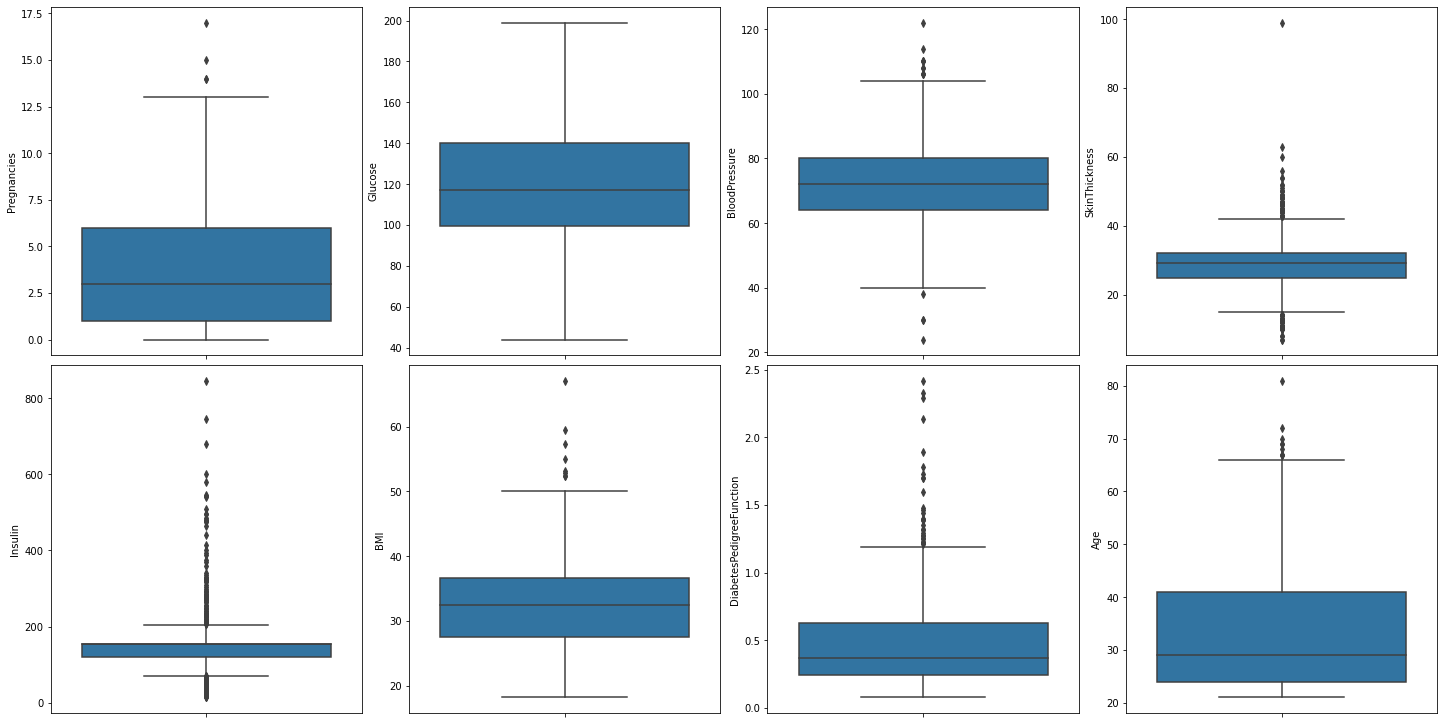

In [12]:
fig, ax=plt.subplots(ncols=4, nrows=2, figsize=(20,10)) 
index=0
ax=ax.flatten()
for col, value in df.items():
    if col !='Outcome':      
        sns.boxplot(y=col, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=0.5)


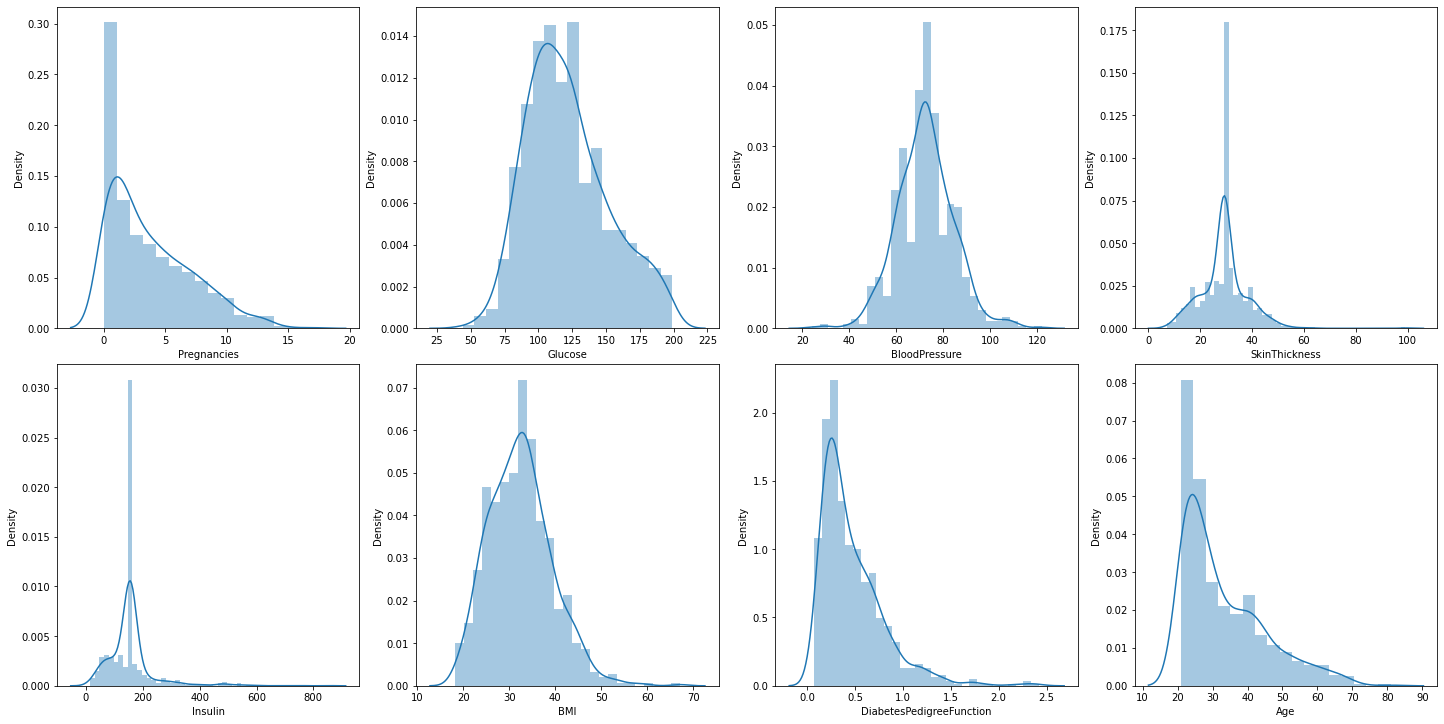

In [13]:
fig, ax=plt.subplots(ncols=4, nrows=2, figsize=(20,10)) 
index=0
ax=ax.flatten()
for col, value in df.items():
    if col !='Outcome':    
        sns.distplot(value, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=0.5)

# Correlation Matrix

<AxesSubplot:>

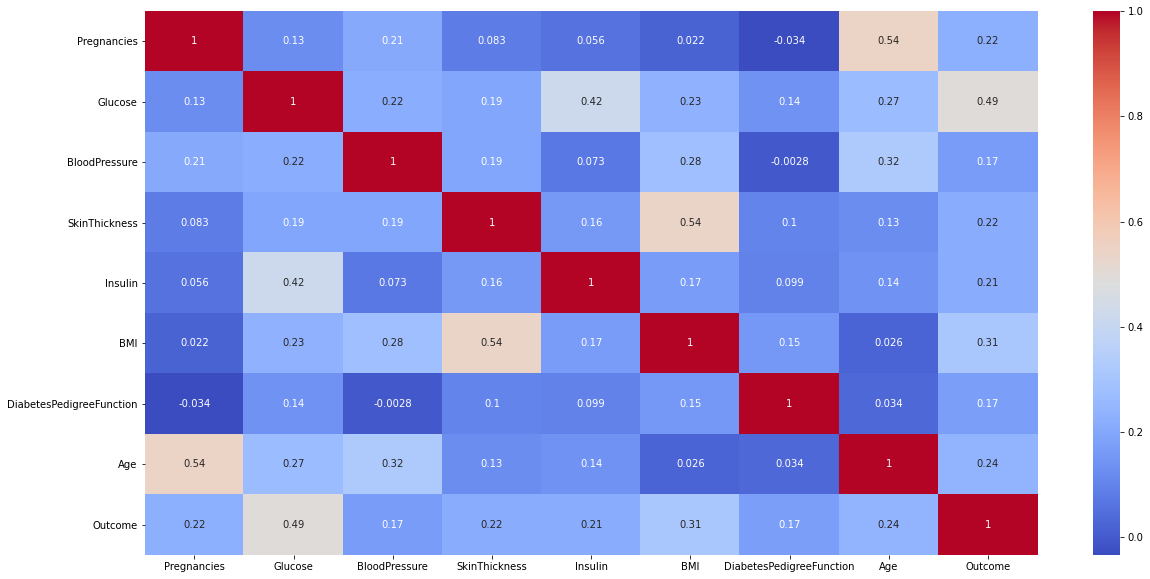

In [14]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap='coolwarm')

# Normalization

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [17]:
cols_scale=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','Pregnancies']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[cols_scale]=scaler.fit_transform(df[cols_scale])

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.627,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.351,0.166667,0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.672,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.167,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,2.288,0.200000,1


# Train-Test split

In [19]:
X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

# Cross-Validation Score for ML models

In [23]:
from sklearn.model_selection import cross_val_score
def classify (model,x,y):
    x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy rate:", model.score(x_test,y_test)*100)
    score=cross_val_score(model,x,y,cv=5)
    print("Cross Val. is:", np.mean(score)*100)


In [24]:
from sklearn.svm import SVC
model = SVC()
classify(model, X,y)

Accuracy rate: 75.97402597402598
Cross Val. is: 76.70316611493082


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X,y)

Accuracy rate: 78.57142857142857
Cross Val. is: 76.43578643578644


In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X,y)

Accuracy rate: 74.02597402597402
Cross Val. is: 75.39682539682539


In [27]:
from sklearn.tree import DecisionTreeClassifier
model = RandomForestClassifier()
classify(model, X,y)

Accuracy rate: 72.72727272727273
Cross Val. is: 76.56480774127832


In [32]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X,y)

Accuracy rate: 75.32467532467533
Cross Val. is: 75.00551735845853


# Training our model with LogisticRegression and SVC

In [30]:
model_log_reg=LogisticRegression()
model_log_reg.fit(x_train,y_train)
y_pred_log_reg=model_log_reg.decision_function(x_test)

model_SVC=SVC()
model_SVC.fit(x_train,y_train)
y_pred_SVC=model_SVC.decision_function(x_test)

# plotting ROC and calculating AUC

Text(0, 0.5, 'TP rate')

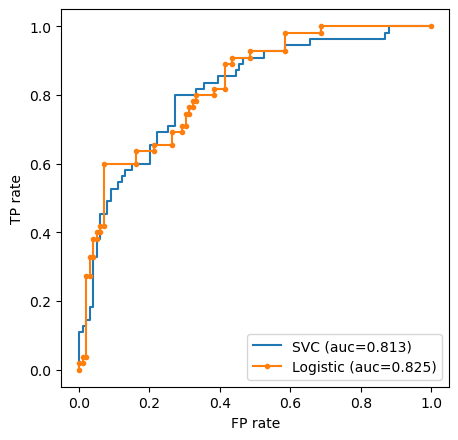

In [36]:
from sklearn.metrics import roc_curve, auc
log_reg_fpr, log_reg_tpr, threshold=roc_curve(y_test,y_pred_log_reg)
auc_log=auc(log_reg_fpr, log_reg_tpr)

svc_fpr,svc_tpr, threshold=roc_curve(y_test,y_pred_SVC)
auc_svc=auc(svc_fpr,svc_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(svc_fpr,svc_tpr, linestyle='-', label='SVC (auc=%0.3f)' %auc_svc)
plt.plot(log_reg_fpr, log_reg_tpr, marker='.', label='Logistic (auc=%0.3f)' %auc_log)

plt.legend()
plt.xlabel('FP rate')
plt.ylabel('TP rate')

In [ ]:
# ROC curve and AUC confirm that our cross-val scores were accurate and Logistic Regression model works better.